In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from IPython.core.debugger import Tracer;

In [20]:
df=pd.read_csv("heart.csv")

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
data=np.array(df)
data
data[1,0]

37.0

In [23]:
def SSE(m,b,data):
    totalError=0.0
    totalNan = 0
    for i in range(data.shape[0]):
        if(math.isnan(data[i,0])):
            totalNan +=1
        else:
            yOutput = m*data[i,0]+b
            y = data[i,1]
            error = (y-yOutput)**2
            totalError =totalError+ error
    return totalError
        

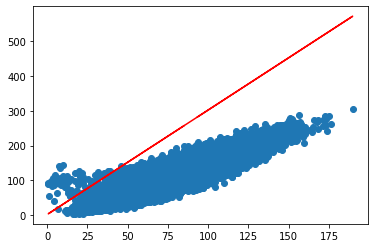

In [24]:
m = 3
b = 2
plt.scatter(X,y)
plt.plot(X,m*X+b,color='red')
plt.show()

In [25]:
sse = SSE(m,b,data)
print('For the fitting line: y = %sx + %s\nSSE: %.2f' %(m,b,sse))

For the fitting line: y = 3x + 2
SSE: 8415882.00


In [26]:
def gradientdescent(m,b,data):   
    n_points=data.shape[0] 
    m_grad=0
    b_grad=0
    stepper=0.0001 
    for i in range(n_points):
        x=data[i,0]
        y=data[i,1]
        if(math.isnan(x)|math.isnan(y)):
            continue
        dm = -((2/n_points) * x * (y - (m*x + b)))
        db = - ((2/n_points) * (y - (m*x + b)))
        m_grad = m_grad + dm
        b_grad = b_grad + db
    m_updated = m - stepper*m_grad
    b_updated = b - stepper*b_grad   
    return m_updated,b_updated

In [27]:
print('Starting line: y = %.2fx + %.2f - Error: %.2f' %(m,b,sse))
for i in range(10000):
    m,b = gradientdescent(m,b,data)
    sse = SSE(m,b,data)
print('\nBest  line: y = %.2fx + %.2f - Error: %.2f' %(m,b,sse))


Starting line: y = 3.00x + 2.00 - Error: 8415882.00

Best  line: y = -0.02x + 1.89 - Error: 72.13


m  -0.021803371178983646
b  1.8938616164058162


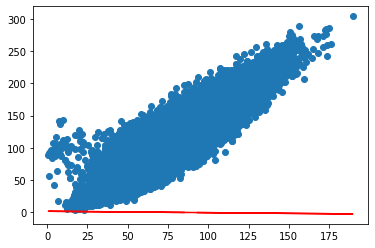

In [28]:
print('m ',m)
print('b ',b)
plt.scatter(X,y)
plt.plot(X,m*X+b,color='red')
plt.show()

In [29]:
m

-0.021803371178983646

In [30]:
b

1.8938616164058162